# Phishing Domain Detection
## Testing Deep Learning for 53 features

[Dataset Link](https://data.mendeley.com/datasets/72ptz43s9v/1)<br>
[Dataset Description](https://www.sciencedirect.com/science/article/pii/S2352340920313202)

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
import warnings
import os

In [4]:
df = pd.read_csv("data/final_data.csv")

In [5]:
X = df.drop(columns=['phishing'])
X.head()

,directory_length,time_domain_activation,qty_slash_directory,qty_at_file,qty_slash_file,qty_equal_file,qty_dot_file,ttl_hostname,qty_equal_directory,qty_plus_file,...,qty_hyphen_domain,qty_and_directory,qty_questionmark_file,qty_hashtag_directory,params_length,qty_dot_params,qty_params,url_shortened,qty_equal_params,qty_space_params
0,8,-1,1,0,0,0,1,892,0,0,...,0,0,0,0,-1,-1,-1,0,-1,-1
1,42,579,3,0,0,0,1,9540,0,0,...,0,0,0,0,165,0,3,0,3,0
2,1,-1,1,0,0,0,0,589,0,0,...,0,0,0,0,-1,-1,-1,0,-1,-1
3,62,-1,5,0,0,0,1,292,0,0,...,0,0,0,0,-1,-1,-1,0,-1,-1
4,-1,6998,-1,-1,-1,-1,-1,3597,-1,-1,...,0,-1,-1,-1,-1,-1,-1,0,-1,-1


In [6]:
X_cols = X.columns
X_cols

Index(['directory_length', 'time_domain_activation', 'qty_slash_directory',
       'qty_at_file', 'qty_slash_file', 'qty_equal_file', 'qty_dot_file',
       'ttl_hostname', 'qty_equal_directory', 'qty_plus_file', 'asn_ip',
       'time_response', 'time_domain_expiration', 'qty_underline_file',
       'domain_length', 'qty_percent_directory', 'qty_dot_domain',
       'qty_hyphen_file', 'file_length', 'qty_asterisk_directory',
       'qty_exclamation_directory', 'qty_asterisk_file', 'qty_tilde_file',
       'qty_at_directory', 'qty_vowels_domain', 'qty_plus_directory',
       'qty_exclamation_file', 'qty_dot_directory', 'qty_mx_servers',
       'qty_nameservers', 'qty_underline_directory', 'qty_hyphen_directory',
       'qty_comma_directory', 'qty_space_file', 'qty_and_file',
       'qty_dollar_directory', 'qty_questionmark_directory',
       'qty_space_directory', 'qty_ip_resolved', 'qty_redirects',
       'tls_ssl_certificate', 'qty_percent_file', 'domain_spf',
       'qty_hyphen_domai

In [7]:
y = df['phishing']
y

0        1
1        1
2        0
3        1
4        0
        ..
87198    0
87199    0
87200    1
87201    1
87202    0
Name: phishing, Length: 87203, dtype: int64

In [8]:
y.values.ravel()

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [9]:
# #Oversampling using SMOTE
# from imblearn.over_sampling import SMOTE

# X, y = SMOTE().fit_resample(X, y)

# # checking the sizes of the sample data
# print("Size of X:", X.shape)
# print("Size of y:", y.shape)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(87203, 53)

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69762, 53), (17441, 53), (69762,), (17441,))

In [12]:
# import pickle
# pickle.dump(scaler, open('scaling.pkl','wb'))

In [13]:
len(X_cols)

53

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

features = len(X_cols)

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Instantiate the optimizer
opt = Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,921 (70.00 KB)

 Trainable params: 17,921 (70.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.callbacks import Callback
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_loss') < 0.1:
            print("\nReached 0.1 val_loss, so stopping training!")
            self.model.stop_training = True

callback = myCallback()

In [17]:
# start training the model 
history = model.fit(X_train, y_train, epochs=200,batch_size=256, callbacks=[callback],validation_data=(X_test,y_test),verbose=1)

Epoch 1/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8411 - loss: 0.5380 - val_accuracy: 0.9185 - val_loss: 0.2227
Epoch 2/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9240 - loss: 0.2080 - val_accuracy: 0.9339 - val_loss: 0.1806
Epoch 3/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9342 - loss: 0.1742 - val_accuracy: 0.9368 - val_loss: 0.1661
Epoch 4/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9397 - loss: 0.1572 - val_accuracy: 0.9401 - val_loss: 0.1570
Epoch 5/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9413 - loss: 0.1474 - val_accuracy: 0.9409 - val_loss: 0.1508
Epoch 6/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9426 - loss: 0.1429 - val_accuracy: 0.9462 - val_loss: 0.1440
Epoch 7/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9478 - loss: 0.1379 - val_accuracy: 0.9489 - val_loss: 0.1401
Epoch 8/200
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9502 - loss: 0.1302 - val_acc

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


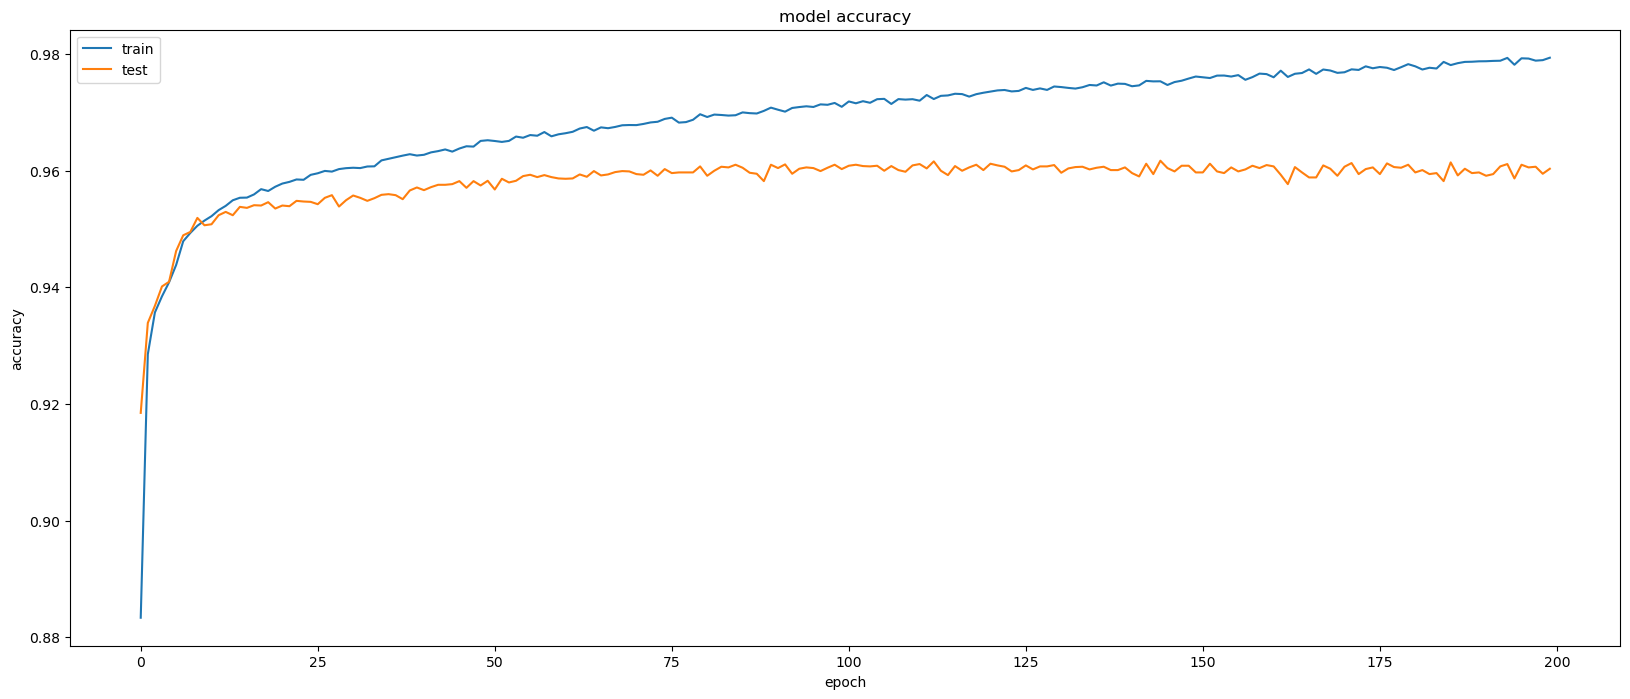

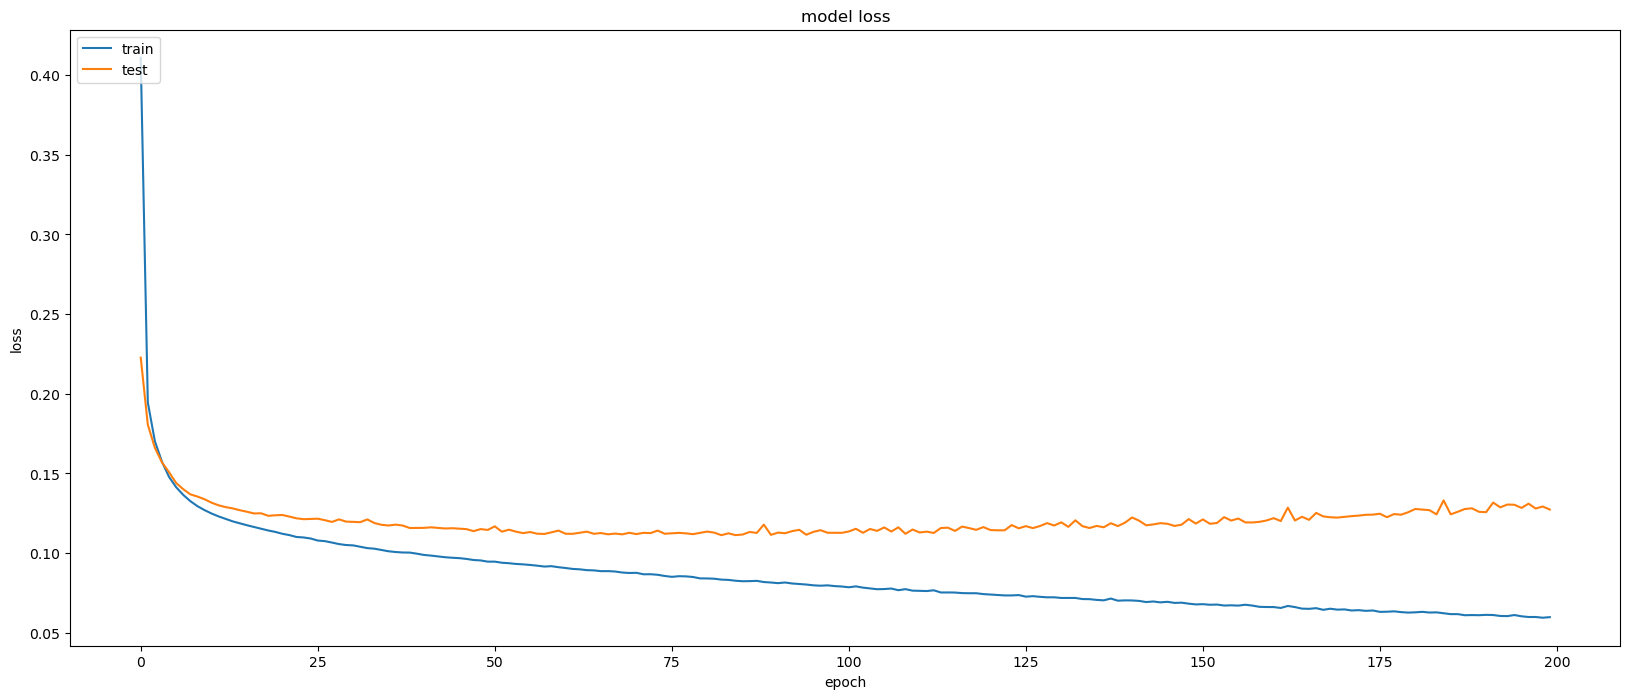

In [18]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Display final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Final Training Accuracy: 0.9794
Final Validation Accuracy: 0.9603
Test Accuracy: 0.9603


In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test data
y_test_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions:
# Threshold predicted probabilities (> 0.5) to classify as positive (1) or negative (0) class
y_test_pred = (y_test_pred > 0.5).astype(int)

# Function to evaluate the model
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    class_report = classification_report(predicted, true, target_names=["legitimate", "malicious"])
    return accuracy, class_report

# Evaluate the model using the defined function
accuracy, class_report = evaluate_model(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)

546/546 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9603
Classification Report:
              precision    recall  f1-score   support

  legitimate       0.97      0.97      0.97     11538
   malicious       0.94      0.95      0.94      5903

    accuracy                           0.96     17441
   macro avg       0.95      0.96      0.96     17441
weighted avg       0.96      0.96      0.96     17441



## Testing sample URL

In [21]:
import dns.resolver
import whois
import ipwhois
import requests
import socket
import ssl
import time
from urllib.parse import urlparse, parse_qs

def extract_url_features(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc.split(':')[0]
    path = parsed_url.path
    query = parsed_url.query
    params = parsed_url.params
    fragment = parsed_url.fragment
    
    def count_occurrences(string, chars):
        return {char: string.count(char) for char in chars}
    
    chars_to_count = ".-_/=?@&! ~,+*#$%"
    
    # URL FEATURES
    url_counts = count_occurrences(url, chars_to_count)
    tld = domain.split('.')[-1] if '.' in domain else ''

    # URL DOMAIN FEATURES
    domain_counts = count_occurrences(domain, chars_to_count)

    vowels = 'aeiou'
    qty_vowels_domain = sum(domain.lower().count(vowel) for vowel in vowels)

    def is_ip(domain):
        try:
            socket.inet_aton(domain)
            return True
        except socket.error:
            return False
        
    # URL DIRECTORY FEATURES
    path_counts = count_occurrences(path, chars_to_count)

    # URL FILE FEATURES
    query_counts = count_occurrences(query, chars_to_count)

    # URL PARAMETERS FEATURES
    params_counts = count_occurrences(params, chars_to_count)

    # ATTRIBUTES BASED ON RESOLVING URL AND EXTERNAL SERVICES
    
    def get_time_response(domain):
        try:
            start_time = time.time()
            requests.get(f"http://{domain}", timeout=5)
            return time.time() - start_time
        except:
            return None

    def domain_has_spf(domain):
        try:
            answers = dns.resolver.resolve(domain, 'TXT')
            for rdata in answers:
                if 'v=spf1' in str(rdata):
                    return 1
            return 0
        except:
            return -1
        
    def domain_to_ip(domain):
        try:
            ip_address = socket.gethostbyname(domain)
            return ip_address
        except socket.error:
            return -1
        
    def get_asn_ip(domain):
        try:
            # Convert domain to IP address
            ip_address = domain_to_ip(domain)
            if ip_address:
                # Perform WHOIS lookup using ipwhois library
                obj = ipwhois.IPWhois(ip_address)
                result = obj.lookup_rdap()
                # Extract ASN information if available
                asn = result.get('asn')
                if asn:
                    return int(asn.split(' ')[0])  # Extract ASN number
                else:
                    return -1  # Return -1 if ASN information not found
            else:
                return -1  # Return -1 if domain to IP conversion fails

        except Exception:
            return -1  # Return -1 on error

    def get_whois_info(domain):
        try:
            domain_info = whois.whois(domain)
            creation_date = domain_info.creation_date
            expiration_date = domain_info.expiration_date
            
            if isinstance(creation_date, list):
                creation_date = creation_date[0]
            if isinstance(expiration_date, list):
                expiration_date = expiration_date[0]
            
            time_domain_activation = (time.time() - creation_date.timestamp()) / (60 * 60 * 24) if creation_date else -1
            time_domain_expiration = (expiration_date.timestamp() - time.time()) / (60 * 60 * 24) if expiration_date else -1
            return time_domain_activation, time_domain_expiration
        except:
            return -1, -1
        
    def get_qty_ip_resolved(domain):
        try:
            ips = socket.gethostbyname_ex(domain)
            return len(ips[2])  # Return the number of resolved IPs
        except socket.gaierror:
            return -1  # Return -1 if there's an error resolving IPs
        
    def get_qty_nameservers(domain):
        try:
            answers = dns.resolver.resolve(domain, 'NS')
            return len(answers)  # Return the number of resolved name servers
        except dns.resolver.NoAnswer:
            return 0  # Return 0 if no name servers found
        except dns.resolver.NXDOMAIN:
            return -1  # Return -1 if domain does not exist
        except dns.resolver.Timeout:
            return -1  # Return -1 on timeout or other DNS resolution errors

    def get_qty_mx_servers(domain):
        try:
            answers = dns.resolver.resolve(domain, 'MX')
            qty_mx_servers = len(answers)
        except:
            qty_mx_servers = 0
        return qty_mx_servers
    
    def get_ttl_hostname(domain):
        try:
            answers = dns.resolver.resolve(domain, 'A')
            return answers.rrset.ttl  # Return TTL of the hostname
        except dns.resolver.NoAnswer:
            return -1  # Return -1 if no answer found
        except dns.resolver.NXDOMAIN:
            return -1  # Return -1 if domain does not exist
        except dns.resolver.Timeout:
            return -1  # Return -1 on timeout or other DNS resolution errors
        
    def check_tls_ssl_certificate(domain):
        try:
            context = ssl.create_default_context()
            with socket.create_connection((domain, 443)) as sock:
                with context.wrap_socket(sock, server_hostname=domain) as ssock:
                    cert = ssock.getpeercert()
                    return 1 if cert else 0  # Return True if valid certificate found
        except ssl.SSLError:
            return 0  # Return False if SSL error occurs or no certificate found
        except (socket.gaierror, socket.timeout):
            return 0  # Return False on connection or timeout errors

    # Function for qty_redirects (Number of Redirects)
    def get_qty_redirects(url):
        try:
            response = requests.head(url, allow_redirects=True)
            return len(response.history)  # Return the number of redirects followed
        except requests.RequestException:
            return -1  # Return -1 if there's an error in making the request

    # Function for url_google_index (Check if URL is Indexed on Google)
    def is_url_indexed_on_google(url):
        try:
            response = requests.get(f"https://www.google.com/search?q=info:{url}")
            return 1 if response.status_code == 200 and url in response.text else False
        except requests.RequestException:
            return 0  # Return False if there's an error in making the request

    # Function for domain_google_index (Check if Domain is Indexed on Google)
    def is_domain_indexed_on_google(domain):
        try:
            response = requests.get(f"https://www.google.com/search?q=site:{domain}")
            return 1 if response.status_code == 200 and domain in response.text else False
        except requests.RequestException:
            return 0  # Return False if there's an error in making the request
    
    
    time_response = get_time_response(domain)
    domain_spf = domain_has_spf(domain)
    time_domain_activation, time_domain_expiration = get_whois_info(domain)
    qty_mx_servers = get_qty_mx_servers(domain)
    qty_ip_resolved = get_qty_ip_resolved(domain)
    asn_ip = get_asn_ip(domain)
    qty_nameservers = get_qty_nameservers(domain)
    ttl_hostname = get_ttl_hostname(domain)
    tls_ssl_certificate = check_tls_ssl_certificate(domain)
    qty_redirects = get_qty_redirects(url)
    url_google_index = is_url_indexed_on_google(url)
    domain_google_index = is_domain_indexed_on_google(domain)
    
    features = {
        # URL features
        "qty_dot_url": url_counts['.'],
        "qty_hyphen_url": url_counts['-'],
        "qty_underline_url": url_counts['_'],
        "qty_slash_url": url_counts['/'],
        "qty_questionmark_url": url_counts['?'],
        "qty_equal_url": url_counts['='],
        "qty_at_url": url_counts['@'],
        "qty_and_url": url_counts['&'],
        "qty_exclamation_url": url_counts['!'],
        "qty_space_url": url_counts[' '],
        "qty_tilde_url": url_counts['~'],
        "qty_comma_url": url_counts[','],
        "qty_plus_url": url_counts['+'],
        "qty_asterisk_url": url_counts['*'],
        "qty_hashtag_url": url_counts['#'],
        "qty_dollar_url": url_counts['$'],
        "qty_percent_url": url_counts['%'],
        "qty_tld_url": len(tld),
        "length_url": len(url),
        
        # Domain features
        "qty_dot_domain": domain_counts['.'],
        "qty_hyphen_domain": domain_counts['-'],
        "qty_underline_domain": domain_counts['_'],
        "qty_slash_domain": domain_counts['/'],
        "qty_questionmark_domain": domain_counts['?'],
        "qty_equal_domain": domain_counts['='],
        "qty_at_domain": domain_counts['@'],
        "qty_and_domain": domain_counts['&'],
        "qty_exclamation_domain": domain_counts['!'],
        "qty_space_domain": domain_counts[' '],
        "qty_tilde_domain": domain_counts['~'],
        "qty_comma_domain": domain_counts[','],
        "qty_plus_domain": domain_counts['+'],
        "qty_asterisk_domain": domain_counts['*'],
        "qty_hashtag_domain": domain_counts['#'],
        "qty_dollar_domain": domain_counts['$'],
        "qty_percent_domain": domain_counts['%'],
        "qty_vowels_domain": qty_vowels_domain,
        "domain_length": len(domain),
        "domain_in_ip": 1 if is_ip(domain) else 0,
        "server_client_domain": 1 if "client" in domain or "server" in domain else 0,
        
        # Directory features
        "qty_dot_directory": path_counts['.'],
        "qty_hyphen_directory": path_counts['-'],
        "qty_underline_directory": path_counts['_'],
        "qty_slash_directory": path_counts['/'],
        "qty_questionmark_directory": path_counts['?'],
        "qty_equal_directory": path_counts['='],
        "qty_at_directory": path_counts['@'],
        "qty_and_directory": path_counts['&'],
        "qty_exclamation_directory": path_counts['!'],
        "qty_space_directory": path_counts[' '],
        "qty_tilde_directory": path_counts['~'],
        "qty_comma_directory": path_counts[','],
        "qty_plus_directory": path_counts['+'],
        "qty_asterisk_directory": path_counts['*'],
        "qty_hashtag_directory": path_counts['#'],
        "qty_dollar_directory": path_counts['$'],
        "qty_percent_directory": path_counts['%'],
        "directory_length": len(path),
        
        # File features
        "qty_dot_file": query_counts['.'],
        "qty_hyphen_file": query_counts['-'],
        "qty_underline_file": query_counts['_'],
        "qty_slash_file": query_counts['/'],
        "qty_questionmark_file": query_counts['?'],
        "qty_equal_file": query_counts['='],
        "qty_at_file": query_counts['@'],
        "qty_and_file": query_counts['&'],
        "qty_exclamation_file": query_counts['!'],
        "qty_space_file": query_counts[' '],
        "qty_tilde_file": query_counts['~'],
        "qty_comma_file": query_counts[','],
        "qty_plus_file": query_counts['+'],
        "qty_asterisk_file": query_counts['*'],
        "qty_hashtag_file": query_counts['#'],
        "qty_dollar_file": query_counts['$'],
        "qty_percent_file": query_counts['%'],
        "file_length": len(query),
        
        # Parameters features
        "qty_dot_params": params_counts['.'],
        "qty_hyphen_params": params_counts['-'],
        "qty_underline_params": params_counts['_'],
        "qty_slash_params": params_counts['/'],
        "qty_questionmark_params": params_counts['?'],
        "qty_equal_params": params_counts['='],
        "qty_at_params": params_counts['@'],
        "qty_and_params": params_counts['&'],
        "qty_exclamation_params": params_counts['!'],
        "qty_space_params": params_counts[' '],
        "qty_tilde_params": params_counts['~'],
        "qty_comma_params": params_counts[','],
        "qty_plus_params": params_counts['+'],
        "qty_asterisk_params": params_counts['*'],
        "qty_hashtag_params": params_counts['#'],
        "qty_dollar_params": params_counts['$'],
        "qty_percent_params": params_counts['%'],
        "params_length": len(params),
        "tld_present_params": 1 if tld != '' else 0,
        "qty_params": len(parse_qs(query)),
        "email_in_url": 1 if '@' in url else 0,
        
        # WHOIS and DNS features
        "time_response": time_response if time_response is not None else -1,
        "domain_spf": domain_spf if domain_spf is not None else -1,
        "asn_ip": asn_ip,
        "time_domain_activation": time_domain_activation if time_domain_activation is not None else -1,
        "time_domain_expiration": time_domain_expiration if time_domain_expiration is not None else -1,
        "qty_ip_resolved": qty_ip_resolved,  # Placeholder, requires DNS lookup
        "qty_nameservers": qty_nameservers,  # Placeholder, requires DNS lookup
        "qty_mx_servers": qty_mx_servers if qty_mx_servers  is not None else 0,
        "ttl_hostname": ttl_hostname,  # Placeholder, requires DNS lookup
        "tls_ssl_certificate": tls_ssl_certificate,  # Placeholder, requires SSL/TLS library
        "qty_redirects": qty_redirects,  # Placeholder, requires HTTP request handling
        "url_google_index": url_google_index,
        "domain_google_index": domain_google_index,
        "url_shortened": 1 if len(url) < 20 else 0,  # Example condition for shortened URL
    }
    
    return features

In [30]:
# Example usage:
URL = "http://scotiabank-security.com/"
all_features = extract_url_features(URL)

In [31]:
optimal_features = df.drop(columns='phishing').columns
optimal_features

Index(['directory_length', 'time_domain_activation', 'qty_slash_directory',
       'qty_at_file', 'qty_slash_file', 'qty_equal_file', 'qty_dot_file',
       'ttl_hostname', 'qty_equal_directory', 'qty_plus_file', 'asn_ip',
       'time_response', 'time_domain_expiration', 'qty_underline_file',
       'domain_length', 'qty_percent_directory', 'qty_dot_domain',
       'qty_hyphen_file', 'file_length', 'qty_asterisk_directory',
       'qty_exclamation_directory', 'qty_asterisk_file', 'qty_tilde_file',
       'qty_at_directory', 'qty_vowels_domain', 'qty_plus_directory',
       'qty_exclamation_file', 'qty_dot_directory', 'qty_mx_servers',
       'qty_nameservers', 'qty_underline_directory', 'qty_hyphen_directory',
       'qty_comma_directory', 'qty_space_file', 'qty_and_file',
       'qty_dollar_directory', 'qty_questionmark_directory',
       'qty_space_directory', 'qty_ip_resolved', 'qty_redirects',
       'tls_ssl_certificate', 'qty_percent_file', 'domain_spf',
       'qty_hyphen_domai

In [32]:
reqd_features = {key: all_features[key] for key in optimal_features}
reqd_features

{'directory_length': 6,
 'time_domain_activation': -1,
 'qty_slash_directory': 1,
 'qty_at_file': 0,
 'qty_slash_file': 0,
 'qty_equal_file': 2,
 'qty_dot_file': 0,
 'ttl_hostname': 141,
 'qty_equal_directory': 0,
 'qty_plus_file': 0,
 'asn_ip': 15169,
 'time_response': 1.1959991455078125,
 'time_domain_expiration': -1,
 'qty_underline_file': 1,
 'domain_length': 15,
 'qty_percent_directory': 0,
 'qty_dot_domain': 2,
 'qty_hyphen_file': 0,
 'file_length': 38,
 'qty_asterisk_directory': 0,
 'qty_exclamation_directory': 0,
 'qty_asterisk_file': 0,
 'qty_tilde_file': 0,
 'qty_at_directory': 0,
 'qty_vowels_domain': 5,
 'qty_plus_directory': 0,
 'qty_exclamation_file': 0,
 'qty_dot_directory': 0,
 'qty_mx_servers': 0,
 'qty_nameservers': 0,
 'qty_underline_directory': 0,
 'qty_hyphen_directory': 0,
 'qty_comma_directory': 0,
 'qty_space_file': 0,
 'qty_and_file': 1,
 'qty_dollar_directory': 0,
 'qty_questionmark_directory': 0,
 'qty_space_directory': 0,
 'qty_ip_resolved': 16,
 'qty_redire

In [33]:
reqd_features.values()

dict_values([6, -1, 1, 0, 0, 2, 0, 141, 0, 0, 15169, 1.1959991455078125, -1, 1, 15, 0, 2, 0, 38, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 16, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [34]:
reqd_features_array = np.array(list(reqd_features.values()))
reqd_features_array

array([ 6.00000000e+00, -1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.00000000e+00,  0.00000000e+00,  1.41000000e+02,
        0.00000000e+00,  0.00000000e+00,  1.51690000e+04,  1.19599915e+00,
       -1.00000000e+00,  1.00000000e+00,  1.50000000e+01,  0.00000000e+00,
        2.00000000e+00,  0.00000000e+00,  3.80000000e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.60000000e+01,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00, -1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [35]:
model.predict(reqd_features_array.reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


array([[1.]], dtype=float32)

In [110]:
# imp_feature_vals = []
# imp_feature_names=[]
# for key, value in all_features.items():
#     if key in df.columns:
#         imp_feature_names.append(key)
#         imp_feature_vals.append(value)

# len(imp_feature_vals)

36

In [111]:
# imp_feature_vals = np.array(imp_feature_vals).reshape(1, -1)
# imp_feature_vals.shape

(1, 36)

In [112]:
# model.predict(np.array(imp_feature_vals).reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


array([[4.70338e-25]], dtype=float32)